### This notebook contains the Data exploration related to the AdvanceML project.

This project aims to develop an innovative reinforcement learning (RL) model for adaptive portfolio management, focusing on a mix of assets:  GOOGL stock, S&P500 index (^GSPC) and gold (GC=F). The core of the project involves designing an RL agent capable of executing buy, sell, and hold actions for each asset at each timestep, based on both quantitative market data and qualitative insights derived from NLP analysis. The action space is defined to allow for simultaneous decisions across assets, enhancing the model's ability to dynamically adjust the portfolio in response to changing market conditions and investor preferences.

In this Notebook we will perform some exploratory data analysis on the data at hand to understand what we are dealing with. We will predominantly focusing on volume and adjusted closing price for each stock.

## Imports

In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
from statsmodels.graphics import tsaplots

warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.display.max_columns = None

## Data Fetching functions

In [2]:
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def get_data(start_date, end_date, tickers=['GOOG', '^GSPC', 'GC=F']):
    '''
    get data from yf for tickers
    :return: dataframe
    '''
    # get data
    stock_data = {}
    for ticker in tickers:
        stock_data[ticker] = get_stock_data(ticker, start_date, end_date)
        
    return stock_data

## Data Fetching Parameters

In [3]:
start_date = '2016-01-01' # Data start date
end_date = '2021-01-01' # Data end date

tickers=['GOOG', '^GSPC', 'GC=F']
train_test_split = 0.7

In [4]:
data = get_data(start_date, end_date, tickers)
for ticker in tickers:
    data[ticker]['daily_pct_change'] = (data[ticker]['Adj Close']- data[ticker]['Adj Close'].shift(-1))/data[ticker]['Adj Close'].shift(-1)*100


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
for ticker, df in data.items():
    print('\n')
    print('----'*20 + '\n')
    print(f'{ticker} Data Description')
    print('----'*20 + '\n')
    print(df.describe())
    print(df.describe())
    print(df.describe())
    print('\n'*2)



--------------------------------------------------------------------------------

GOOG Data Description
--------------------------------------------------------------------------------

              Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     54.471045    55.002341    53.966072    54.504184    54.504184   
std      13.429470    13.634689    13.269075    13.455000    13.455000   
min      33.392502    33.615002    33.153000    33.412998    33.412998   
25%      41.787750    42.098749    41.562750    41.849751    41.849751   
50%      54.178001    54.712250    53.610249    54.138000    54.138000   
75%      61.469501    62.068499    60.972250    61.526999    61.526999   
max      91.225998    92.360001    91.132500    91.399498    91.399498   

             Volume  daily_pct_change  
count  1.259000e+03       1258.000000  
mean   3.343065e+07         -0.054430  
std    1.537262e+07      

## Data analysis functions

In [6]:
def info(stock, df):
    """
    Print the summary information of each stock.

    Parameters
    ----------
    stock: str
      Stock company name.
    df: DataFrame
      Stock's dataframe.

    Returns
    -------
    None.
    """

    print(f'{stock}\'s Historical Data: \n\n {df} \n\n')
    print(f'{stock}\'s Column Information: \n')
    print(df.info(),'\n\n')
    print(f'{stock}\'s Statistic Summary: \n\n {df.describe().round(4)}')
    print('-'*75)
    print()
    
def boxplot(stock, df):
    """
    Plot the boxplot of adjusted close price.

    Parameters
    ----------
    df: DataFrame
      Stock's DataFrame.
    stock: str
      Company name.

    Returns
    -------
    None.
    """

    plt.figure(figsize=(8,6))
    plt.boxplot(df['Adj Close'])
    plt.ylabel('Price($)')
    plt.title(f'{stock}\'s Adjusted Close Price', fontsize=15)
    plt.show()

def scatter_matrix(stock, df):
    """
    Plot the scatter matrix.

    Parameters
    ----------
    df: DataFrame
      Stock's DataFrame.
    stock: str
      Company name.
  
    Returns
    -------
    None.
    """

    pd.plotting.scatter_matrix(df, figsize=(8,8), alpha=0.3)
    plt.suptitle(f'Pairwise Scatter Plot of {stock}', x=0.5, y=0.92)
    plt.show()

def heatmap(stock, df):
    """
    Plot the correlation heatmap.

    Parameters
    ----------
    df: DataFrame
      Stock's DataFrame.
    stock: str
      Company name.

    Returns
    -------
    None.
    """

    plt.figure(figsize = (8,8))
    sns.heatmap(df.corr(), cmap='GnBu', annot=True, linewidths = 1, fmt='f').set_title(f'Correlation Heatmap of {stock}', fontsize=15)
    plt.xticks(rotation=30, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()

def autocorrelation(stock, df):
    """
    Plot the autocorrelation of stocks based on adjusted close price.
 
    Parameters
    ----------
    df: DataFrame
      Stock's DataFrame.
    stock: str
      Company name.

    Returns
    -------
    None
    """

    tsaplots.plot_acf(df["Adj Close"], lags=50)  
    plt.title(f'Autocorrelation of {stock}\'s Adjusted Close Price', fontsize=13)
    plt.xlabel('Lags (Days)', fontsize=10)
    plt.ylabel('Correlation', fontsize=10)
    plt.show()


def stock_info_plots(stock, df):
    '''
    """
    Plot adj closing prices percentage change and summary statistics.
 
    Parameters
    ----------
    df: DataFrame
      Stock's DataFrame.
    ticker: str
      Company name.

    Returns
    -------
    None
    """
    '''
    
    # Plot closing prices
    plt.figure(figsize=(14, 7))
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['Adj Close'], label='Adj Close')
    plt.title(f'{ticker} - Adjusted Close Price')
    plt.legend()

    # Plot percentage change
    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['daily_pct_change'], label='% Change', color='orange')
    plt.title(f'{ticker} - Daily Percentage Change')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Display summary statistics
    print(f"{ticker} - Summary Statistics for '% Change':")
    print(df['daily_pct_change'].describe())
    print("\n")

### Stock Exploratory data analysis

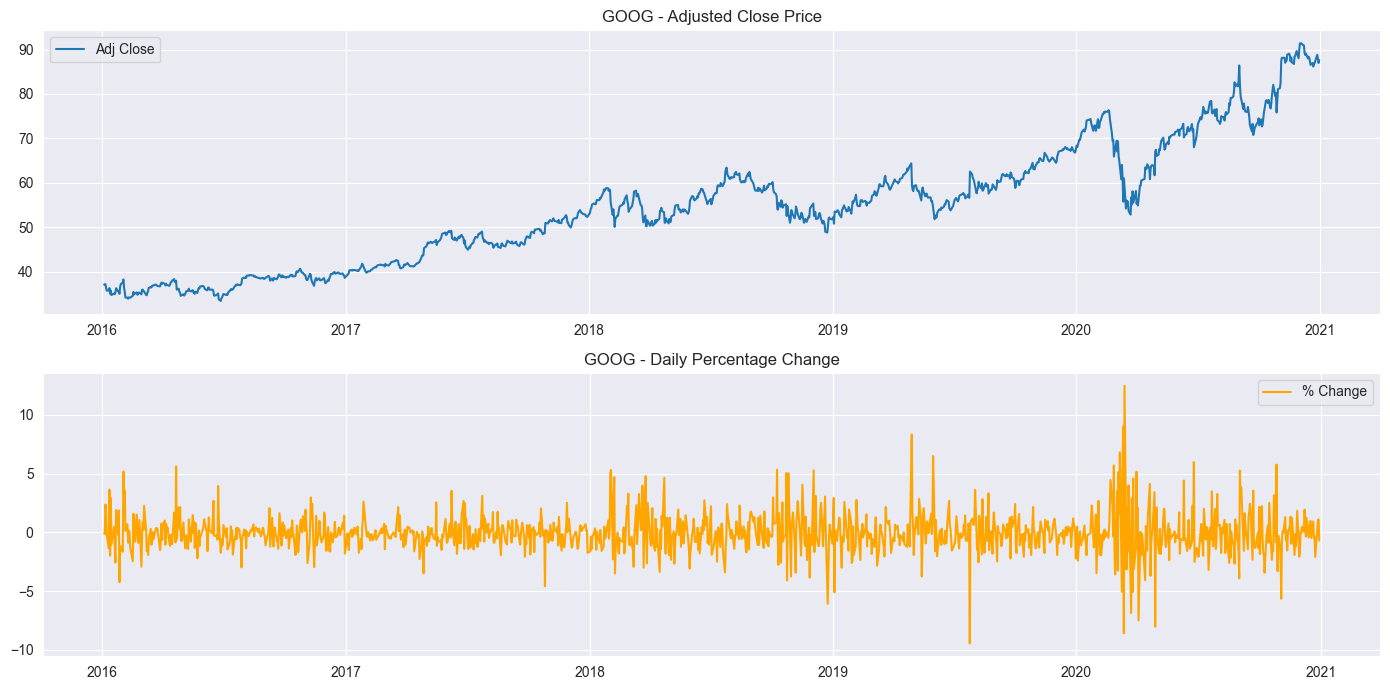

GOOG - Summary Statistics for '% Change':
count    1258.000000
mean       -0.054430
std         1.669293
min        -9.460099
25%        -0.877814
50%        -0.105960
75%         0.577897
max        12.486975
Name: daily_pct_change, dtype: float64


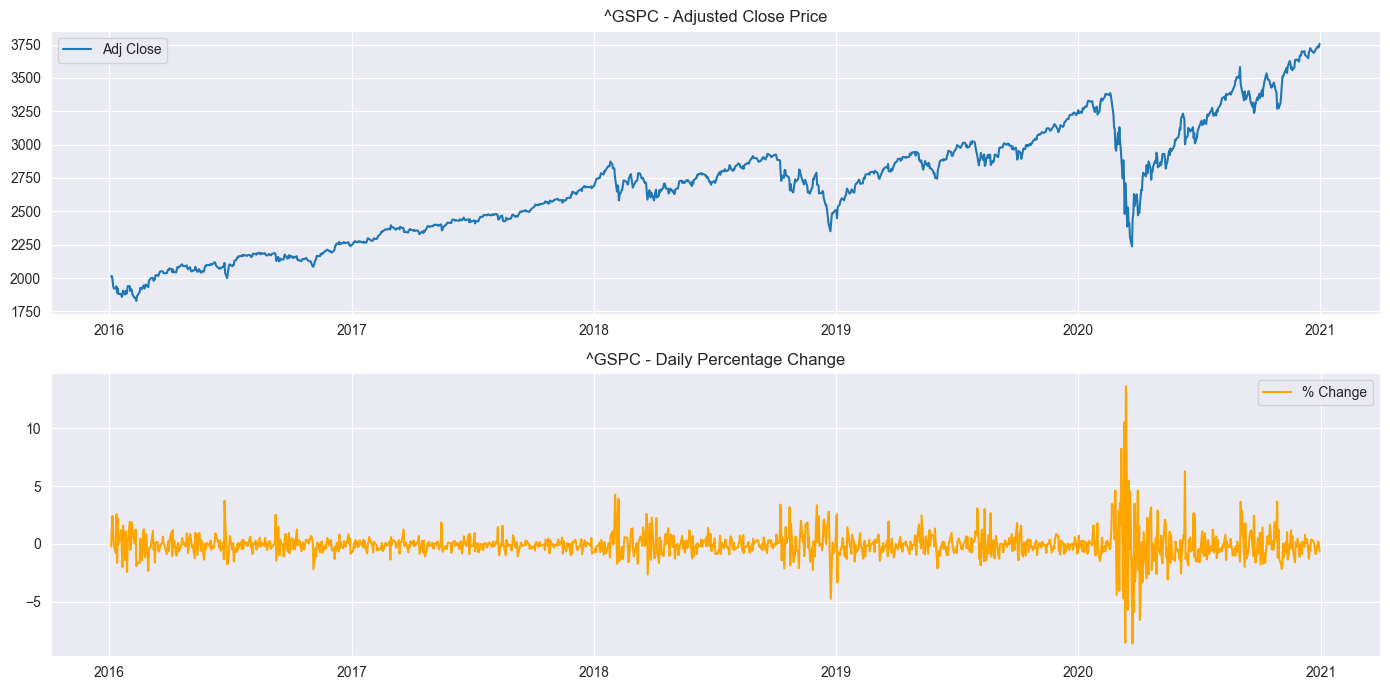

^GSPC - Summary Statistics for '% Change':
count    1258.000000
mean       -0.042142
std         1.226836
min        -8.577927
25%        -0.524880
50%        -0.071102
75%         0.291820
max        13.615778
Name: daily_pct_change, dtype: float64


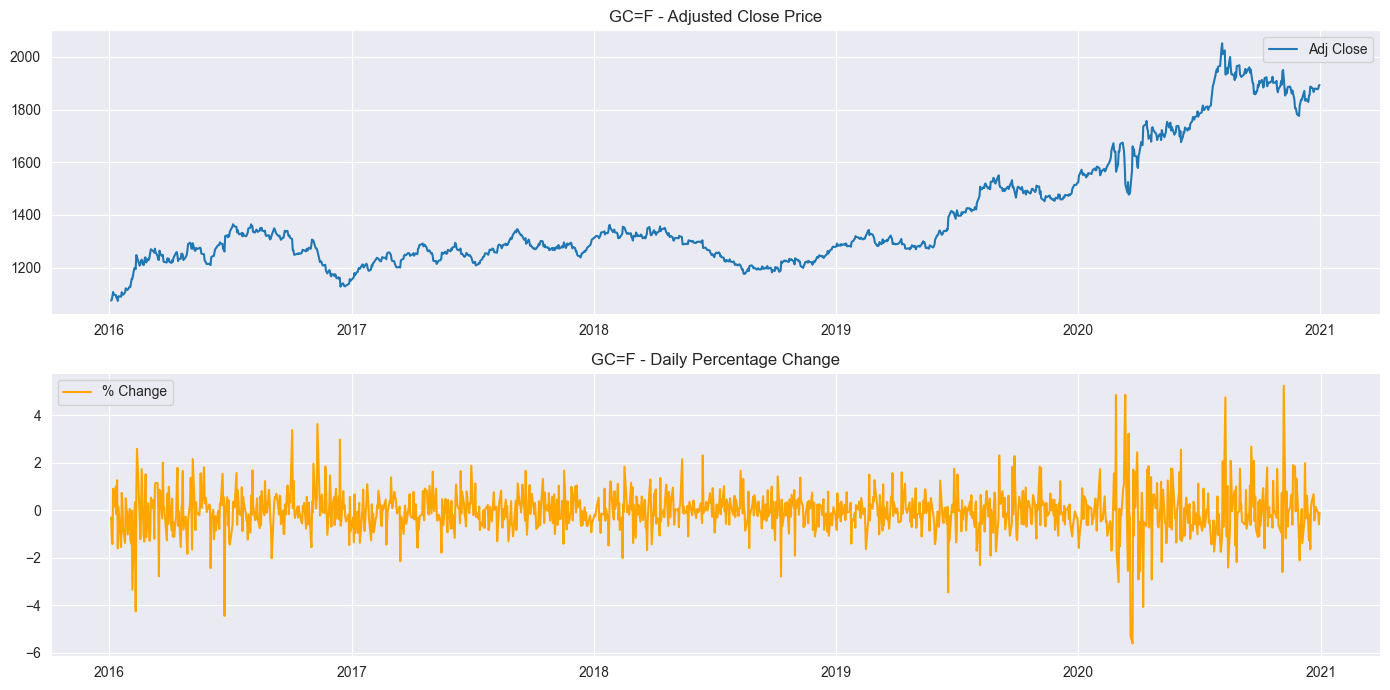

GC=F - Summary Statistics for '% Change':
count    1255.000000
mean       -0.040819
std         0.922643
min        -5.613779
25%        -0.491943
50%        -0.052900
75%         0.376340
max         5.239591
Name: daily_pct_change, dtype: float64


In [7]:
for ticker, df in data.items():
    stock_info_plots(ticker, df) 

GOOG's Historical Data: 

                  Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2016-01-04  37.150002  37.202999  36.562901  37.091999  37.091999  65456000   
2016-01-05  37.322498  37.599998  36.931999  37.129002  37.129002  39014000   
2016-01-06  36.500000  37.359001  36.445999  37.181000  37.181000  38940000   
2016-01-07  36.515499  36.924999  35.952999  36.319500  36.319500  59274000   
2016-01-08  36.572498  36.661499  35.650002  35.723499  35.723499  49018000   
...               ...        ...        ...        ...        ...       ...   
2020-12-24  86.750000  87.300003  86.455498  86.942497  86.942497   6936000   
2020-12-28  87.581749  89.536400  87.316750  88.804497  88.804497  27860000   
2020-12-29  89.389503  89.622002  87.804497  87.935997  87.935997  25988000   
2020-12-30  88.100502  88.254753  86.279999  86.975998  86.975998  26122000   
2020-12-31  86.771004  87

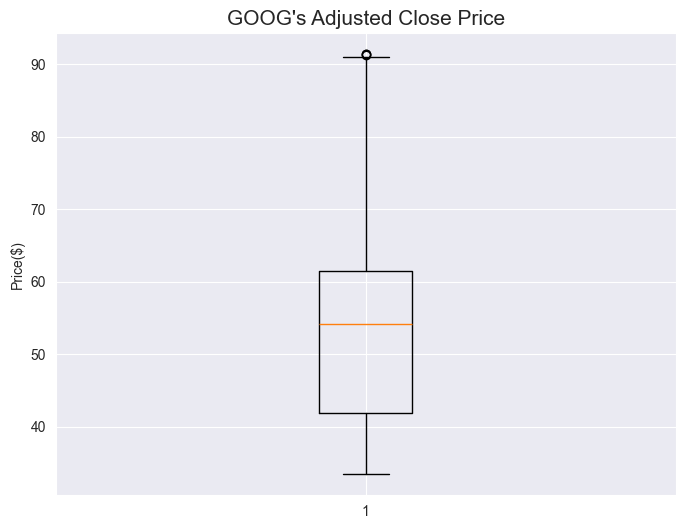

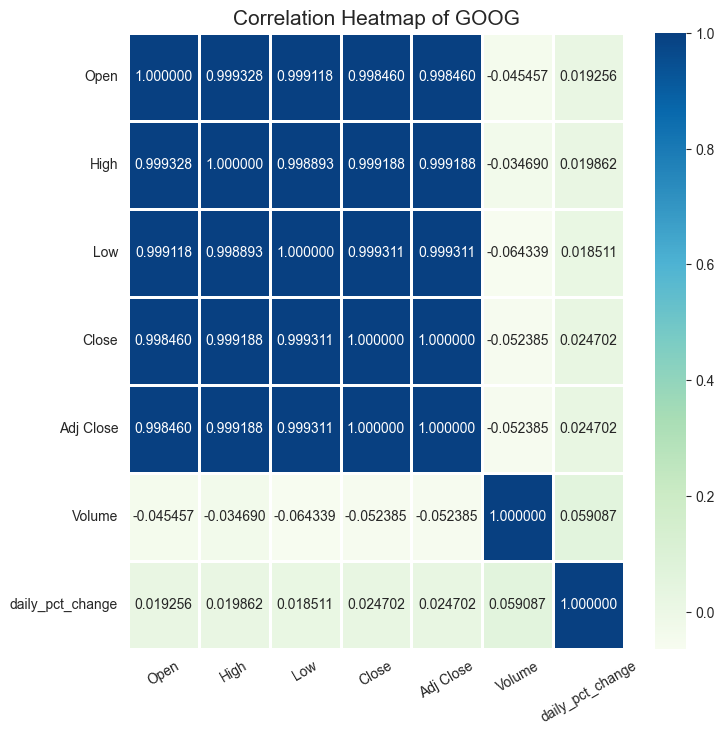

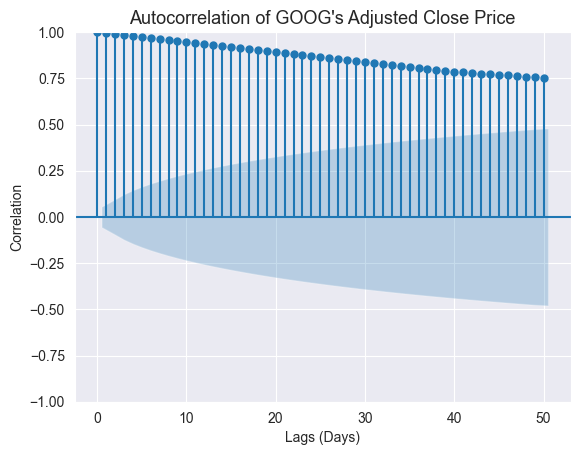

In [8]:
ticker = 'GOOG'
df = data.get(ticker)
info(ticker, df)
boxplot(ticker, df)
heatmap(ticker, df)
autocorrelation(ticker, df)

^GSPC's Historical Data: 

                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2016-01-04  2038.199951  2038.199951  1989.680054  2012.660034  2012.660034   
2016-01-05  2013.780029  2021.939941  2004.170044  2016.709961  2016.709961   
2016-01-06  2011.709961  2011.709961  1979.050049  1990.260010  1990.260010   
2016-01-07  1985.319946  1985.319946  1938.829956  1943.089966  1943.089966   
2016-01-08  1945.969971  1960.400024  1918.459961  1922.030029  1922.030029   
...                 ...          ...          ...          ...          ...   
2020-12-24  3694.030029  3703.820068  3689.320068  3703.060059  3703.060059   
2020-12-28  3723.030029  3740.510010  3723.030029  3735.360107  3735.360107   
2020-12-29  3750.010010  3756.120117  3723.310059  3727.040039  3727.040039   
2020-12-30  3736.189941  3744.629883  3730.209961  3732.040039  3732.040039   
2020-12-31  3733.270020 

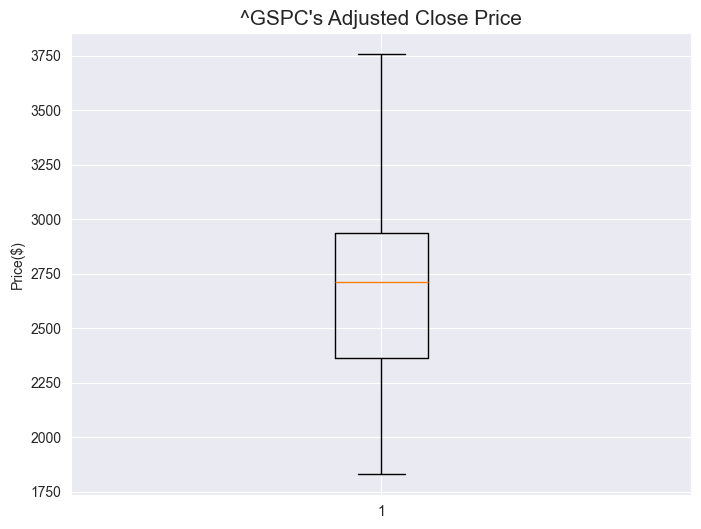

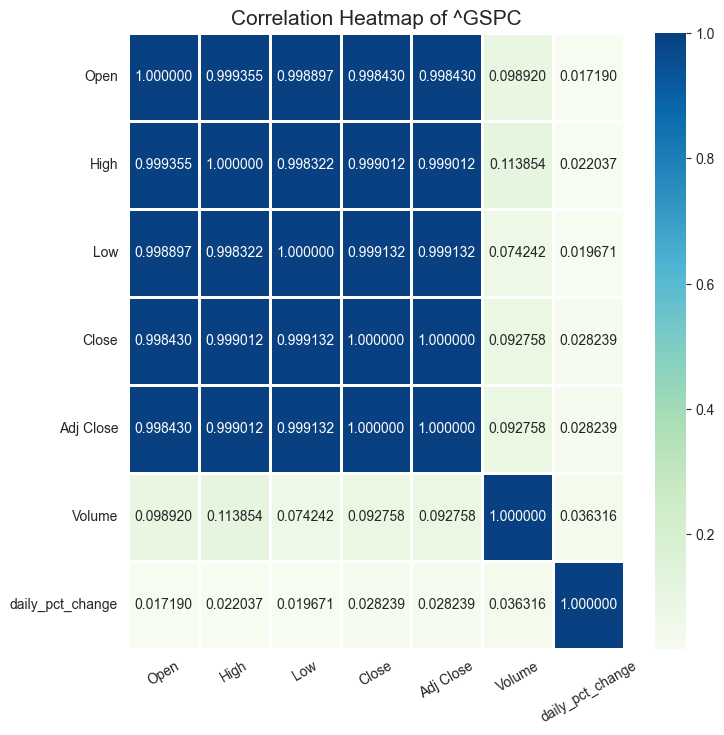

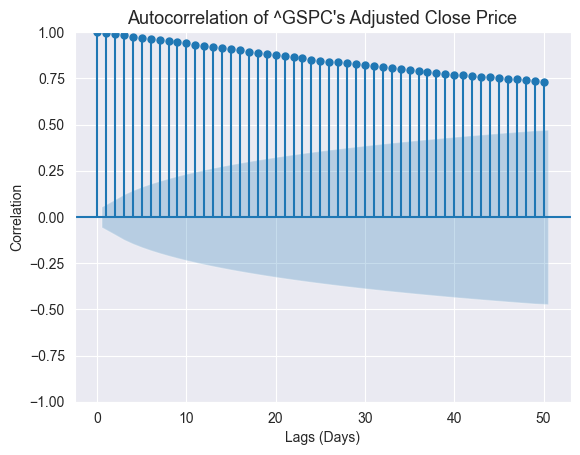

In [9]:
ticker = '^GSPC'
df = data.get(ticker)
info(ticker, df)
boxplot(ticker, df)
heatmap(ticker, df)
autocorrelation(ticker, df)

GC=F's Historical Data: 

                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2016-01-04  1063.400024  1082.500000  1063.199951  1075.099976  1075.099976   
2016-01-05  1075.599976  1081.500000  1075.300049  1078.400024  1078.400024   
2016-01-06  1081.599976  1093.699951  1081.599976  1091.900024  1091.900024   
2016-01-07  1091.599976  1109.400024  1091.599976  1107.699951  1107.699951   
2016-01-08  1111.099976  1111.099976  1093.000000  1097.800049  1097.800049   
...                 ...          ...          ...          ...          ...   
2020-12-24  1877.300049  1879.900024  1875.699951  1879.900024  1879.900024   
2020-12-28  1895.500000  1895.800049  1873.699951  1877.199951  1877.199951   
2020-12-29  1881.300049  1881.300049  1879.699951  1879.699951  1879.699951   
2020-12-30  1879.900024  1895.800049  1877.300049  1891.000000  1891.000000   
2020-12-31  1897.000000  

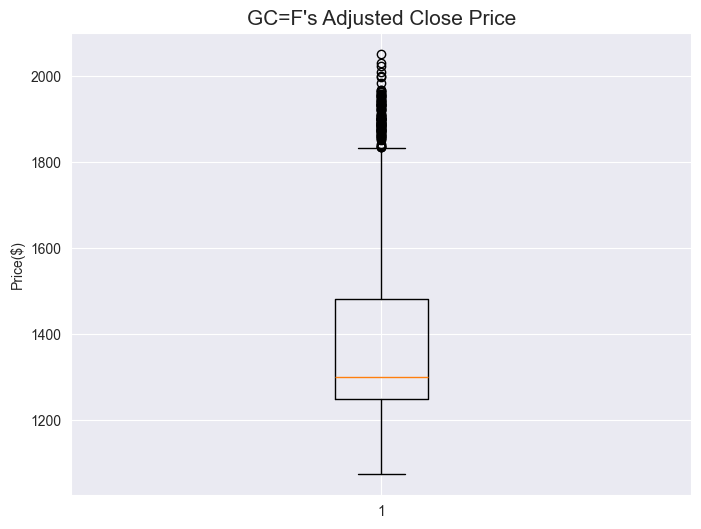

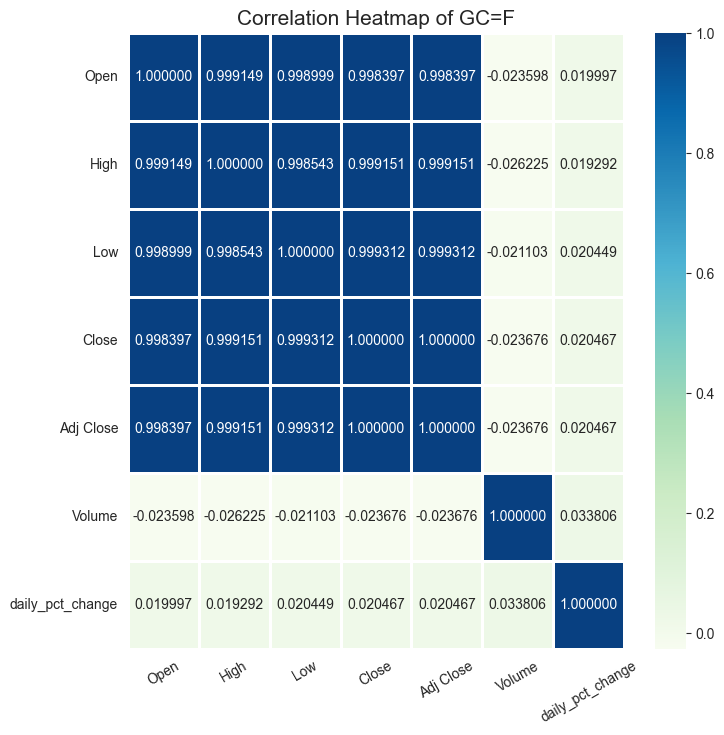

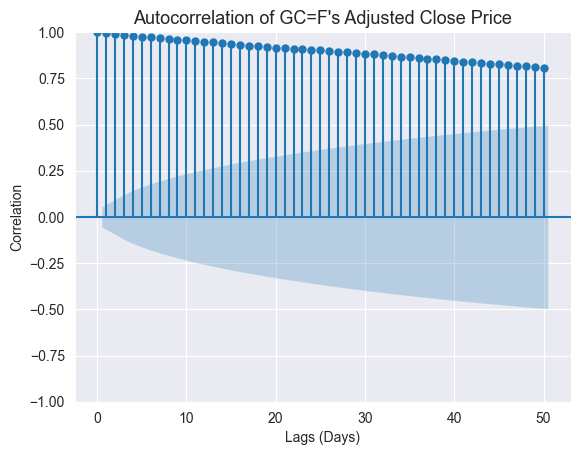

In [10]:
ticker = 'GC=F'
df = data.get(ticker)
info(ticker, df)
boxplot(ticker, df)
heatmap(ticker, df)
autocorrelation(ticker, df)